# 2603655_DataAcquisition

## Week4 20240827

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

In [6]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("pandas version :",pd.__version__)
print("numpy version :",np.__version__)
print("matplotlib version :",mpl.__version__)
print("seaborn version :",sns.__version__)

pandas version : 2.2.1
numpy version : 1.26.4
matplotlib version : 3.8.4
seaborn version : 0.13.2


In [7]:
df = pd.read_csv('data/tham_luang_rescue_data.csv',
                 # parse_dates=['timestamp'],
                 # index_col=['datetime']
                )
df['timestamp']=pd.to_datetime(df['timestamp'],unit='s')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        5000 non-null   datetime64[ns]
 1   id               5000 non-null   int64         
 2   mission_type     5000 non-null   object        
 3   team_size        5000 non-null   int64         
 4   water_level      4750 non-null   float64       
 5   depth            4371 non-null   float64       
 6   oxygen_level     4498 non-null   float64       
 7   temperature      4381 non-null   float64       
 8   victim_status    5000 non-null   object        
 9   victim_count     5000 non-null   int64         
 10  mission_success  5000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 429.8+ KB


In [8]:
df.isna().sum()

timestamp            0
id                   0
mission_type         0
team_size            0
water_level        250
depth              629
oxygen_level       502
temperature        619
victim_status        0
victim_count         0
mission_success      0
dtype: int64

In [9]:
df.head()

,timestamp,id,mission_type,team_size,water_level,depth,oxygen_level,temperature,victim_status,victim_count,mission_success
0,2018-07-03 00:06:54.802960634,2943,medical,5,9.191810,4.362105,16.717150,27.871266,critical,8,1
1,2018-07-02 00:21:53.542708635,2652,rescue,4,10.122547,5.184041,9.949614,27.585167,stable,7,0
2,2018-06-25 06:45:52.390477896,672,exploration,2,13.265970,6.700720,22.294991,27.177927,stable,2,0
3,2018-06-30 22:24:39.175835133,2334,rescue,10,11.141887,5.722605,15.725127,30.659910,critical,6,0
4,2018-06-28 13:02:04.584917068,1631,exploration,10,12.147761,5.789450,4.073761,NaN,stable,4,0


### OJT

In [11]:
df[df.isna().all(axis=1)]

,timestamp,id,mission_type,team_size,water_level,depth,oxygen_level,temperature,victim_status,victim_count,mission_success


In [12]:
df[df.isna().any(axis=1)]

,timestamp,id,mission_type,team_size,water_level,depth,oxygen_level,temperature,victim_status,victim_count,mission_success
4,2018-06-28 13:02:04.584917068,1631,exploration,10,12.147761,5.789450,4.073761,NaN,stable,4,0
8,2018-07-09 10:17:18.447689533,4832,rescue,3,6.001525,3.314556,12.621470,NaN,stable,13,1
11,2018-07-04 10:53:01.596319199,3369,medical,4,8.271053,4.196395,12.507527,NaN,stable,9,0
12,2018-06-23 05:28:05.857171535,68,exploration,8,NaN,NaN,NaN,NaN,critical,1,0
13,2018-06-23 21:52:23.428685665,269,exploration,5,14.743842,7.524298,NaN,29.627839,stable,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4978,2018-07-04 04:55:32.826565266,3296,supply,2,8.318277,4.437159,17.043529,NaN,critical,9,1
4986,2018-06-23 01:18:21.100219965,17,exploration,5,15.276570,7.842431,NaN,25.637212,critical,1,0
4987,2018-07-06 01:24:24.052810907,3841,rescue,2,6.971582,3.816649,20.607267,NaN,stable,10,0
4991,2018-06-27 19:39:01.188237667,1418,medical,6,12.141516,5.642471,17.311944,NaN,stable,4,0


In [13]:
df.isna().any(axis=1).value_counts()

False    3635
True     1365
Name: count, dtype: int64

In [14]:
for i in range(1,5):
    print (f'miss {i}: {len(df[df.isna().sum(axis=1)==i])}')

miss 1: 1016
miss 2: 95
miss 3: 222
miss 4: 32


In [15]:
# df[df.isna().sum(axis=1)>=2]
df[(df.isna().sum(axis=1) >= 2) & (df.isna().sum(axis=1) <= 3)]

,timestamp,id,mission_type,team_size,water_level,depth,oxygen_level,temperature,victim_status,victim_count,mission_success
21,2018-06-28 16:47:20.248049498,1677,exploration,7,13.268345,NaN,NaN,26.269614,stable,4,0
25,2018-07-04 22:57:46.773354769,3517,supply,3,NaN,NaN,NaN,25.602066,stable,9,1
52,2018-06-30 22:19:45.357071400,2333,supply,4,11.594949,NaN,NaN,28.991466,stable,6,1
54,2018-07-06 21:43:44.924984932,4090,exploration,4,NaN,NaN,NaN,26.005402,stable,10,1
77,2018-07-04 02:04:09.169833899,3261,medical,4,NaN,NaN,NaN,26.196043,critical,9,1
...,...,...,...,...,...,...,...,...,...,...,...
4893,2018-07-08 02:27:29.129826068,4442,exploration,7,NaN,NaN,NaN,27.532948,stable,12,1
4909,2018-06-29 00:12:57.755551100,1768,medical,4,11.597075,NaN,20.895515,NaN,critical,5,0
4923,2018-07-07 21:33:40.004000901,4382,rescue,8,NaN,NaN,NaN,28.622366,critical,11,1
4950,2018-06-26 01:17:29.249850035,899,exploration,7,NaN,NaN,NaN,30.724411,unknown,3,0


In [16]:
df.isna().any()

timestamp          False
id                 False
mission_type       False
team_size          False
water_level         True
depth               True
oxygen_level        True
temperature         True
victim_status      False
victim_count       False
mission_success    False
dtype: bool

In [46]:
missing_columns = df.isna().sum().to_frame().loc[lambda x:x[0]>0].index.to_list()
non_missing_columns = [col for col in df.columns if col not in missing_columns]
non_missing_columns.remove('timestamp')
focused_columns = ['mission_type', 'team_size','victim_status','victim_count']

In [48]:
missing_columns, non_missing_columns, focused_columns

(['water_level', 'depth', 'oxygen_level', 'temperature'],
 ['id',
  'mission_type',
  'team_size',
  'victim_status',
  'victim_count',
  'mission_success'],
 ['mission_type', 'team_size', 'victim_status', 'victim_count'])

## Descriptive analysis

In [39]:
df_desc = df[missing_columns].describe().T
df_desc['skew'] = df[missing_columns].skew()
df_desc['kurtosis'] = df[missing_columns].kurtosis()
df_desc.T

,water_level,depth,oxygen_level,temperature
count,4750.000000,4371.000000,4498.000000,4381.000000
mean,10.298641,5.141564,19.925995,27.859964
std,2.929289,1.482007,5.042446,1.938024
min,4.169353,1.997793,-0.001809,20.421595
25%,7.794069,3.882866,16.623480,26.568500
50%,10.309842,5.146677,19.988819,27.871747
75%,12.774526,6.383899,23.331810,29.129341
max,16.648985,8.221066,37.739561,35.181630
skew,0.000345,0.011558,-0.052036,0.003947
kurtosis,-1.129102,-1.093502,0.112162,0.067573


### analysis by categorical vars

In [50]:
df_list = list()
for col in focused_columns:
    for val in df[col].unique():
        df_desc = df[df[col]==val][missing_columns].skew().to_frame()
        df_desc.columns=['skew']
        df_desc['kurtosis'] = df[df[col]==val][missing_columns].kurtosis()
        df_desc = df_desc.T.reset_index()
        df_desc['Detail'] = f'{col.upper()} = {val}'
        df_list.append(df_desc)

In [52]:
df_desc=pd.concat(df_list)
df_desc.sort_values(by=['index','Detail']).reset_index(drop=True)

,index,water_level,depth,oxygen_level,temperature,Detail
0,kurtosis,2.397986,2.070893,0.246962,0.006136,MISSION_TYPE = exploration
1,kurtosis,-0.067883,-0.057176,-0.012544,-0.042919,MISSION_TYPE = medical
2,kurtosis,1.751492,1.794128,0.042784,0.410361,MISSION_TYPE = rescue
3,kurtosis,-0.097498,-0.130162,0.061594,-0.054693,MISSION_TYPE = supply
4,kurtosis,-1.169806,-1.149061,-0.031582,-0.205356,TEAM_SIZE = 10
5,kurtosis,-1.021259,-0.957894,0.037363,0.122840,TEAM_SIZE = 2
6,kurtosis,-1.137058,-1.124914,0.064814,0.005834,TEAM_SIZE = 3
7,kurtosis,-1.132010,-1.078289,0.411058,0.007269,TEAM_SIZE = 4
8,kurtosis,-1.189294,-1.195586,-0.095370,-0.070990,TEAM_SIZE = 5
9,kurtosis,-1.135760,-1.064512,0.040533,0.011114,TEAM_SIZE = 6


## Missing Analysis

### overall analysis

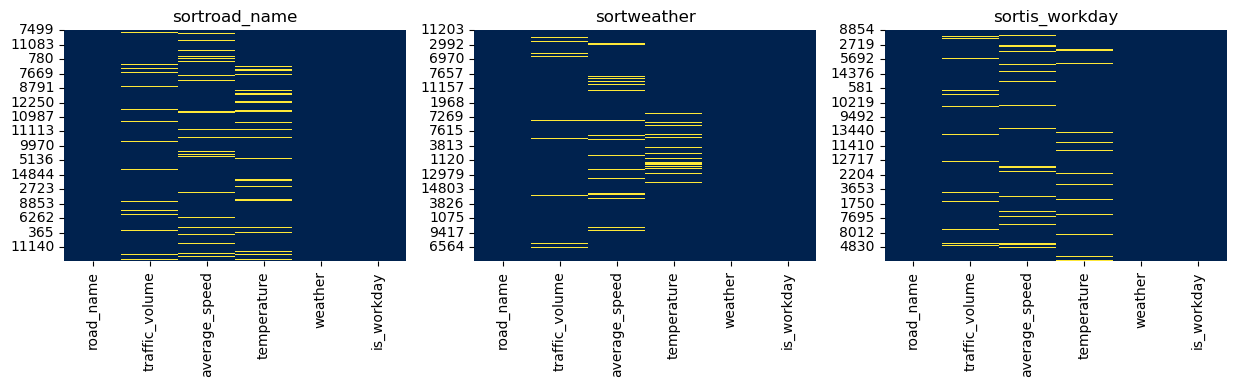

In [29]:
# overall
fig, axes = plt.subplots(1,3, figsize=(15,3))
for i,nm_col in enumerate(non_missing_columns):
    sns.heatmap(df.drop(columns=['datetime']).sort_values(by=[nm_col]).isnull(),cbar=False,
                cmap='cividis',ax=axes[i])
    axes[i].set_title(f'sort{nm_col}')
plt.show;

# MAR for temp for weather at some cases

- MAR for weather:temp

### missing analysis by categorical vars (constraint): heatmap

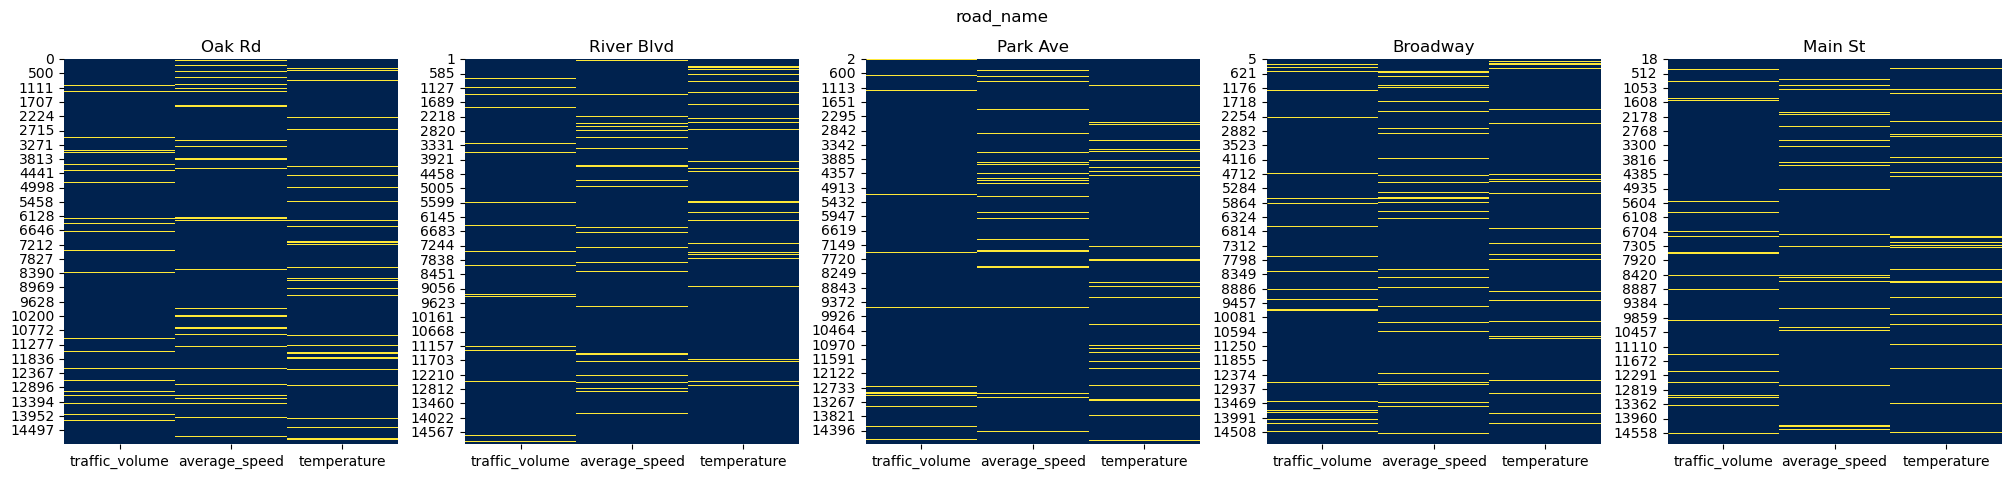

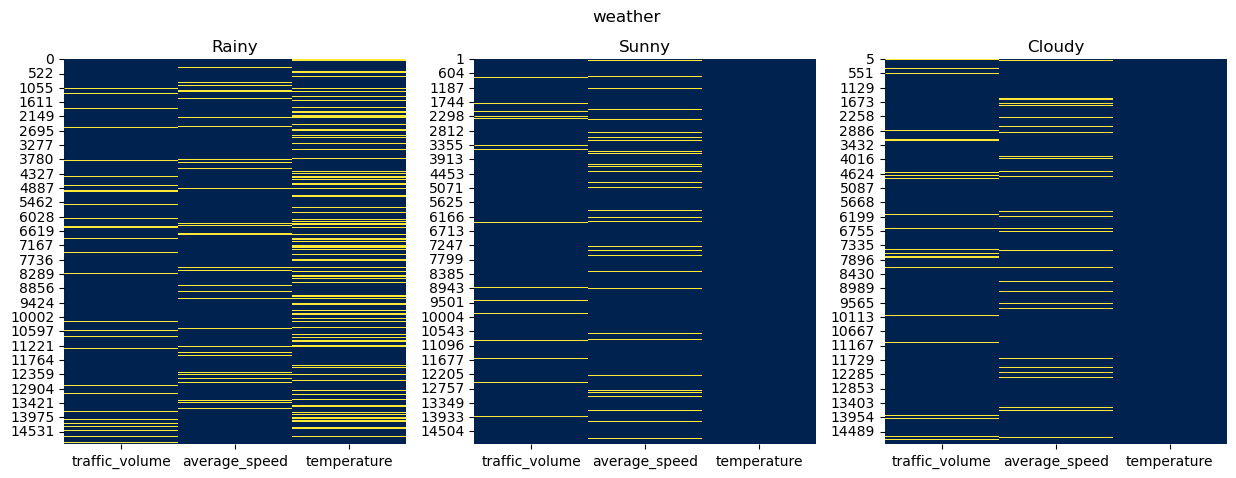

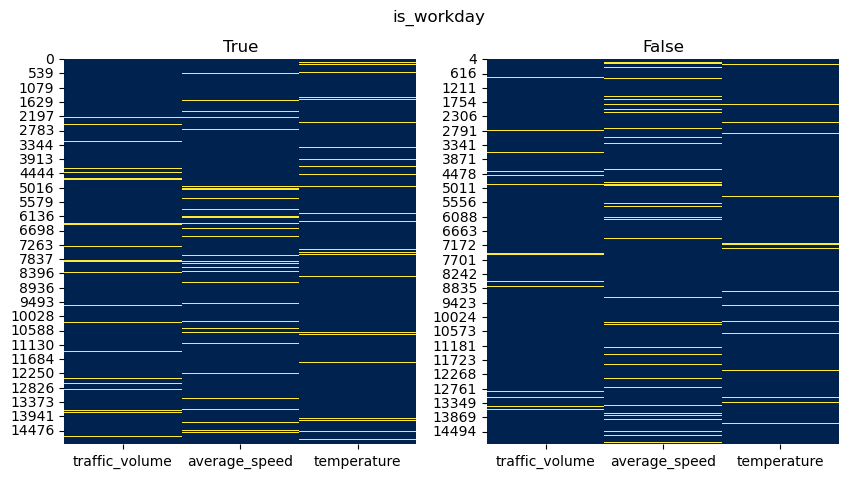

In [32]:
# constraint
for col in non_missing_columns:
    plt_column = len(df[col].unique())
    fig,axes=plt.subplots(1, plt_column, figsize=(5*plt_column,5))
    for i, val in enumerate(df[col].unique()):
        sns.heatmap(df[df[col]==val][missing_columns].isnull(),
                    cbar=False,cmap='cividis',ax=axes[i])
        axes[i].set_title(f'{val}')
    fig.suptitle(f'{col}')
    plt.show()

### back to class